In [7]:
using Pkg
Pkg.activate(@__DIR__)

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples/simple_examples`


### 1. Generate Random Data

In [8]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 6

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply SMOTE

#### Using Imbalance Only

In [9]:
Xover, yover = smote(X, y; k = 100, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

┌ Warning: Warning: k=100 is larger than the number of samples for the data which is (25). Will set k=25-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/smote/smote.jl:102
┌ Warning: Warning: k=100 is larger than the number of samples for the data which is (11). Will set k=11-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/smote/smote.jl:102
┌ Warning: Warning: k=100 is larger than the number of samples for the data which is (14). Will set k=14-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/smote/smote.jl:102


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.2113783359527588, 0.17964564263820648, 0.8642337322235107, 0.48596522212028503, 0.8325796723365784, 0.43495258688926697, 0.11554998904466629, 0.32541534304618835, 0.10430508106946945, 0.6763522624969482], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.43896377086639404, 0.5023065805435181, 0.7078289985656738, 0.3481835424900055, 0.15445081889629364, 0.3017610013484955, 0.7752786874771118, 0.4811354875564575, 0.6104919910430908, 0.1120113655924797], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

#### Using MLJ

In [10]:
smote_model = Imbalance.MLJ.SMOTE(k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.7373326420783997, 0.12323127686977386, 0.6114413142204285, 0.16847562789916992, 0.8011882901191711, 0.07462137937545776, 0.11554998904466629, 0.9065987467765808, 0.8493228554725647, 0.5276296734809875], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.30761826038360596, 0.4304981529712677, 0.4022240936756134, 0.2782510817050934, 0.6001282930374146, 0.5940703749656677, 0.7752786874771118, 0.1396310031414032, 0.1727180927991867, 0.1273624300956726], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.11226218114407538,

#### Using TableTransforms

In [11]:
using Imbalance: TableTransforms.SMOTE
smote_model_t = SMOTE(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

(Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.7373326420783997, 0.12323127686977386, 0.6114413142204285, 0.16847562789916992, 0.8011882901191711, 0.07462137937545776, 0.11554998904466629, 0.9065987467765808, 0.8493228554725647, 0.5276296734809875],
 Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.30761826038360596, 0.4304981529712677, 0.4022240936756134, 0.2782510817050934, 0.6001282930374146, 0.5940703749656677, 0.7752786874771118, 0.1396310031414032, 0.1727180927991867, 0.1273624300956726],
 Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.11226218114407538

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/simple_examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/simple_examples/Manifest.toml`


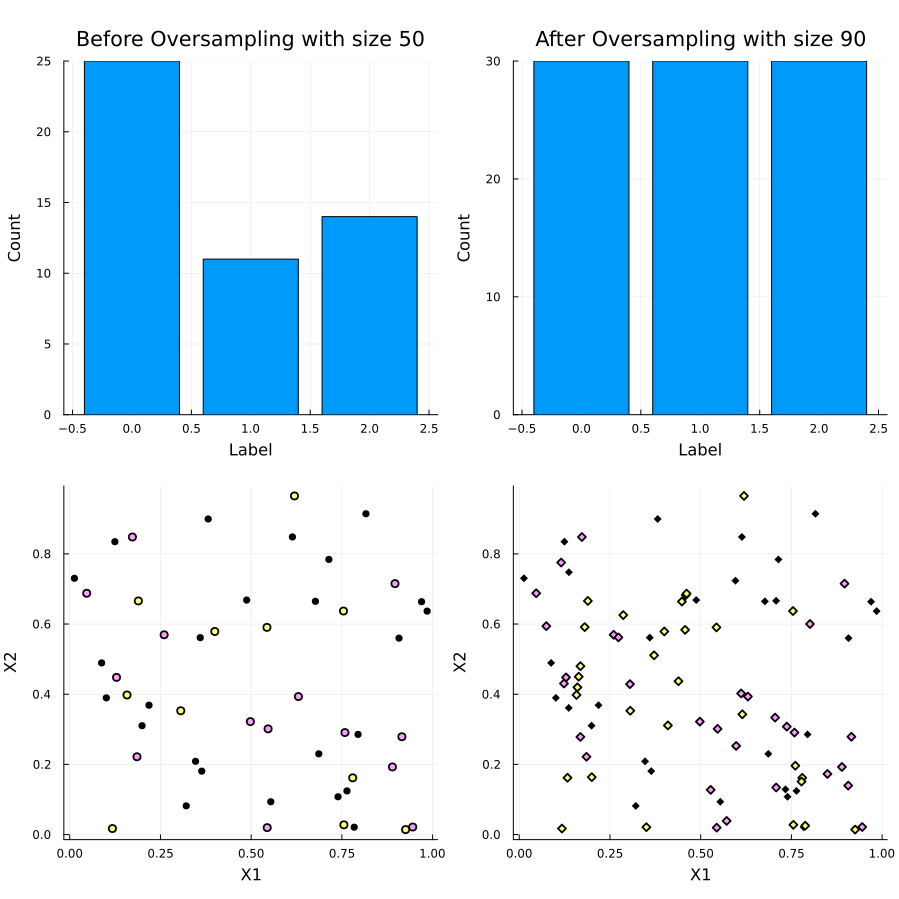

In [12]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)